In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 한국어 텍스트 분석 기초

1. 자연어 처리란?
  : 컴퓨터를 이용해 사람의 자연어를 분석하고 처리하는 기술

2. 자연어 처리의 기본 개념
  - 코퍼스 : 자연어 분석 작업을 위해 만든 샘플 문서 집합
  (단순한 소설, 신문 등의 문서를 모아놓은 형태 / 품사, 형태소등의 보조적 의미를 추가한 형태)
  - 토큰 : 긴 문자열 분석을 위해 작은 단위(단어별, 형태소별)로 나누게 되는데, 이때 문자열의 단위를 토큰이라고 한다.(토큰화 : 문자열을 토큰으로 나누는 작업)


#### 기본 패키지 설치 : konlpy
- 아래 코드는 코랩에서 konlpy실행시 사용하는 코드입니다

In [ ]:
!apt-get update !apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.2"


E: The update command takes no arguments


#### 한국어 텍스트 분석을 위한 클래스
1. Hannanum : KAIST SWRC에서 개발
2. Kkma : 서울대학교 연구실 개발
3. Komoran : Shineware에서 개발
4. Okt : 오픈소스 한국어 분석기로, 과거에는 트위터 형태소 분석기
5. Mecab : 일본어 형태소 분석기를 한국어 분석을 위해 사용할 수 있도록 수정한 클래스
(추가적으로 설치작업 필요)

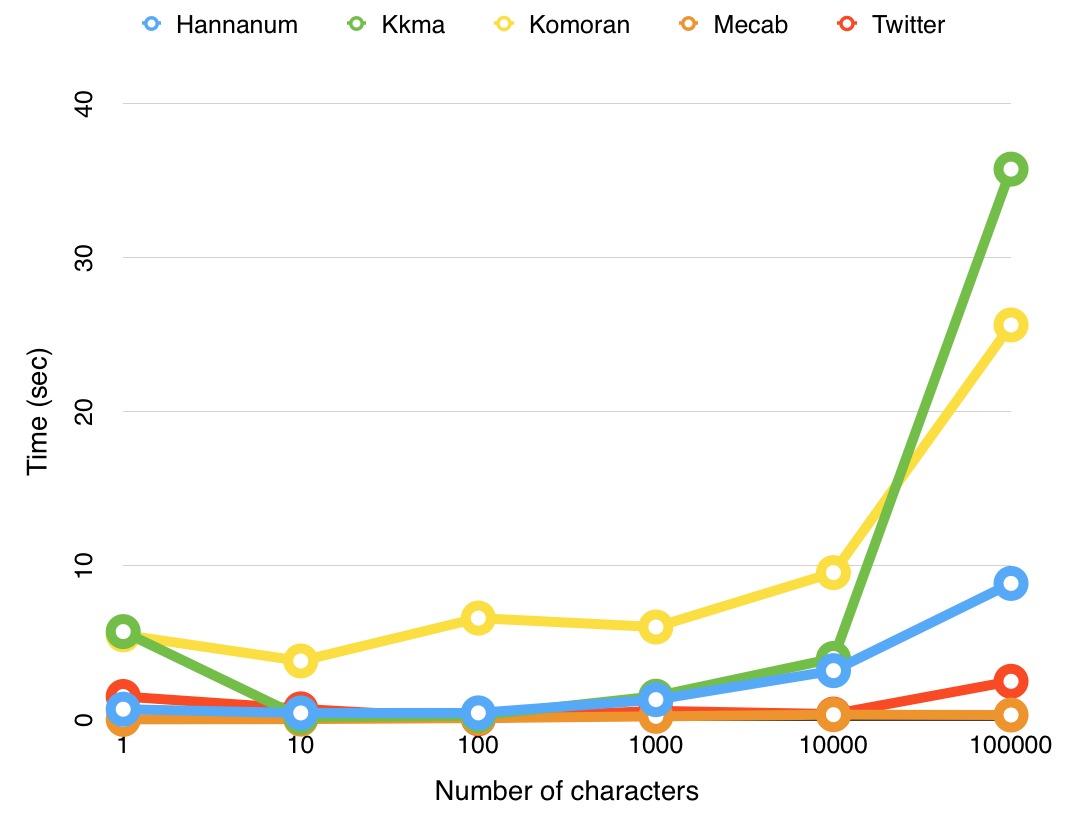

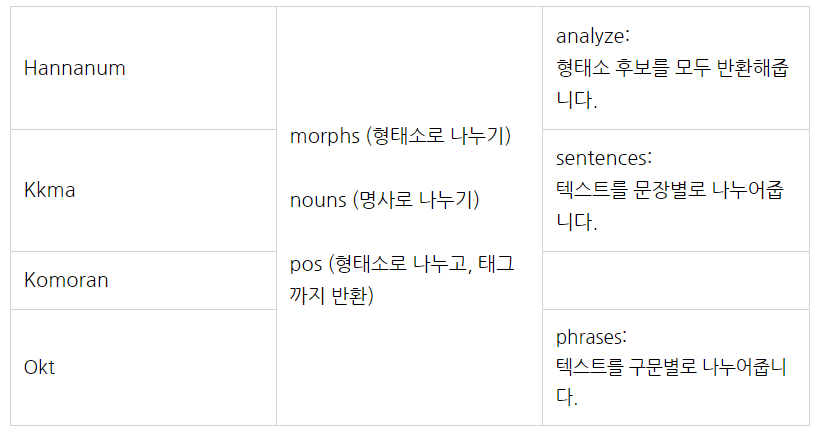

#### hannanum

In [ ]:
from konlpy.tag import Hannanum
hannanum = Hannanum() 

In [ ]:
corona_news = '미국 제약사 모더나사의 코로나19 백신 공급 계획에 차질이 빚어지면서 화이자·모더나 백신의 2차 접종 일정도 일부 변경됐다.'

##### 구 분석 : 모든 형태소 후보 반환

In [ ]:
pharse1 = hannanum.analyze(corona_news)

print(pharse1)

[[[('미국', 'ncn')], [('미국', 'nqq')]], [[('제약사', 'ncn')], [('제', 'xp'), ('약사', 'ncr')]], [[('모더나사', 'ncn'), ('의', 'jcm')], [('모더나사의', 'ncn')], [('모더나사', 'nqq'), ('의', 'jcm')], [('모더나사의', 'nqq')]], [[('코로나19', 'ncn')], [('코로나19', 'nqq')]], [[('백신', 'ncn')]], [[('공급', 'ncpa')], [('공', 'ncn'), ('급', 'xsncc')]], [[('계획', 'ncpa'), ('에', 'jca')]], [[('차질', 'ncpa'), ('이', 'jcc')], [('차질', 'ncpa'), ('이', 'jcs')], [('차질', 'ncpa'), ('이', 'ncn')]], [[('빚', 'pvg'), ('어', 'ecx'), ('지', 'px'), ('면서', 'ecc')], [('빚', 'pvg'), ('어', 'ecx'), ('지', 'px'), ('면서', 'ecs')], [('빚', 'pvg'), ('어', 'ecx'), ('지', 'px'), ('면서', 'ecc')], [('빚', 'pvg'), ('어', 'ecx'), ('지', 'px'), ('면서', 'ecs')]], [[('화이자', 'ncn'), ('·', 'sy'), ('모', 'nbu'), ('이', 'jp'), ('더', 'ep'), ('나', 'ef')], [('화이자', 'ncn'), ('·', 'sy'), ('모', 'nbu'), ('이', 'jp'), ('더', 'ep'), ('어', 'ecs'), ('나', 'jxc')], [('화이자', 'ncn'), ('·', 'sy'), ('모', 'nbu'), ('이', 'jp'), ('더', 'ep'), ('어', 'ecx'), ('나', 'px'), ('아', 'ecs')], [('화이자', 'ncn'), ('·', 'sy'), 

##### 형태소 분석

In [ ]:
morphs1 = hannanum.morphs(corona_news)

print(morphs1)

['미국', '제약사', '모더나사', '의', '코로나19', '백신', '공급', '계획', '에', '차질', '이', '빚', '어', '지', '면서', '화이자·모더', '나', '백신', '의', '2차', '접종', '일정', '도', '일부', '변경', '되', '었다', '.']


##### 명사 분석

In [ ]:
nouns1 = hannanum.nouns(corona_news)

print(nouns1)

['미국', '제약사', '모더나사', '코로나19', '백신', '공급', '계획', '차질', '화이자·모더', '백신', '2차', '접종', '일정', '일부', '변경']


##### 형태소 분석 태깅 : 텍스트에서 품사정보를 부착하여 반환

In [ ]:
pos1 = hannanum.pos(corona_news)

print(pos1)

[('미국', 'N'), ('제약사', 'N'), ('모더나사', 'N'), ('의', 'J'), ('코로나19', 'N'), ('백신', 'N'), ('공급', 'N'), ('계획', 'N'), ('에', 'J'), ('차질', 'N'), ('이', 'J'), ('빚', 'P'), ('어', 'E'), ('지', 'P'), ('면서', 'E'), ('화이자·모더', 'N'), ('나', 'J'), ('백신', 'N'), ('의', 'J'), ('2차', 'N'), ('접종', 'N'), ('일정', 'N'), ('도', 'J'), ('일부', 'N'), ('변경', 'N'), ('되', 'X'), ('었다', 'E'), ('.', 'S')]


###### 품사태그와 기호의 의미 확인

In [ ]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

#### kkma

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

##### 형태소 분석

In [ ]:
morphs2 = kkma.morphs(corona_news)

print(morphs2)

['미국', '제약사', '모', '더나', '사의', '코로나', '19', '백', '신', '공급', '계획', '에', '차질', '이', '빚어지', '면서', '화', '이자', '·', '모', '더나', '백신', '의', '2', '차', '접종', '일정', '도', '일부', '변경', '되', '었', '다', '.']


##### 명사 분석

In [ ]:
nouns2 = kkma.nouns(corona_news)

print(nouns2)

['미국', '제약사', '모', '모더나사의', '더나', '사의', '코로나', '코로나19', '19', '백', '백신', '신', '공급', '계획', '차질', '화', '화이자', '이자', '모더나', '백신', '2', '2차', '차', '접종', '일정', '일부', '변경']


##### 형태소 분석 태깅

In [ ]:
pos2 = kkma.pos(corona_news)

print(pos2)

[('미국', 'NNP'), ('제약사', 'NNG'), ('모', 'NNG'), ('더나', 'NNP'), ('사의', 'NNG'), ('코로나', 'NNG'), ('19', 'NR'), ('백', 'NR'), ('신', 'NNG'), ('공급', 'NNG'), ('계획', 'NNG'), ('에', 'JKM'), ('차질', 'NNG'), ('이', 'JKS'), ('빚어지', 'VV'), ('면서', 'ECE'), ('화', 'NNG'), ('이자', 'NNG'), ('·', 'SP'), ('모', 'NNG'), ('더나', 'NNP'), ('백신', 'NNG'), ('의', 'JKG'), ('2', 'NR'), ('차', 'NNM'), ('접종', 'NNG'), ('일정', 'NNG'), ('도', 'JX'), ('일부', 'NNG'), ('변경', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


###### 품사태그와 기호의 의미확인

In [ ]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

##### 문장 분석 : 텍스트를 문장별로 나누어줌

In [ ]:
corona_news2 = '미국 제약사 모더나사의 코로나19 백신 공급 계획에 차질이 빚어지면서 화이자·모더나 백신의 2차 접종 일정도 일부 변경됐다. 문자나 카카오톡을 통한 사전 연락도 없이 일정이 미뤄진 사례들이 잇따라 네티즌들의 불만이 커지고 있다.'

In [ ]:
sentence1 = kkma.sentences(corona_news2)

print(sentence1)

['미국 제약사 모 더나 사의 코로나 19 백 신 공급 계획에 차질이 빚어지면서 화 이자· 모 더나 백신의 2차 접종 일정도 일부 변경됐다.', '문자나 카카오 톡 을 통한 사전 연락도 없이 일정이 미뤄 진 사례들이 잇따라 네티즌들의 불만이 커지고 있다.']


#### Komoran

In [ ]:
from konlpy.tag import Komoran

komoran = Komoran()

##### 형태소 분석

In [ ]:
morphs3 = komoran.morphs(corona_news)
print(morphs3)

['미국', '제', '약사', '모', '더', '나사', '의', '코로나', '19', '백신', '공급', '계획', '에', '차질', '이', '빚어지', '면서', '화이자', '·', '모', '더', '나', '백신', '의', '2', '차', '접종', '일정', '도', '일부', '변경', '되', '었', '다', '.']


In [ ]:
nouns3 = komoran.nouns(corona_news)
print(nouns3)

['미국', '약사', '모', '더', '나사', '코로나', '19', '백신', '공급', '계획', '차질', '화이자', '모', '더', '백신', '차', '접종', '일정', '일부', '변경']


In [ ]:
pos3 = komoran.pos(corona_news)
print(pos3)

[('미국', 'NNP'), ('제', 'XPN'), ('약사', 'NNP'), ('모', 'NNG'), ('더', 'NNG'), ('나사', 'NNP'), ('의', 'JKG'), ('코로나', 'NNP'), ('19', 'NNP'), ('백신', 'NNP'), ('공급', 'NNG'), ('계획', 'NNG'), ('에', 'JKB'), ('차질', 'NNG'), ('이', 'JKS'), ('빚어지', 'VV'), ('면서', 'EC'), ('화이자', 'NNP'), ('·', 'SP'), ('모', 'NNP'), ('더', 'NNG'), ('나', 'JC'), ('백신', 'NNP'), ('의', 'JKG'), ('2', 'SN'), ('차', 'NNB'), ('접종', 'NNG'), ('일정', 'NNG'), ('도', 'JX'), ('일부', 'NNG'), ('변경', 'NNG'), ('되', 'XSV'), ('었', 'EP'), ('다', 'EF'), ('.', 'SF')]


In [ ]:
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

#### Okt

In [ ]:
from konlpy.tag import Okt 
okt = Okt()

##### 형태소분석

In [ ]:
morphs4 = okt.morphs(corona_news)
print(morphs4)

['미국', '제', '약사', '모', '더', '나', '사의', '코로나', '19', '백신', '공급', '계획', '에', '차질', '이', '빚', '어', '지면', '서', '화이자', '·', '모', '더', '나', '백신', '의', '2', '차', '접종', '일정', '도', '일부', '변경', '됐다', '.']


##### 명사분석

In [ ]:
nouns4 = okt.nouns(corona_news)
print(nouns4)

['미국', '약사', '더', '사의', '코로나', '백신', '공급', '계획', '차질', '빚', '지면', '화이자', '더', '백신', '차', '접종', '일정', '일부', '변경']


##### 어절분석 : 텍스트를 구문별로 나누어줌

In [ ]:
phrases4 = okt.phrases(corona_news)
print(phrases4)

['미국', '미국 제약사', '미국 제약사 모더', '사의', '사의 코로나19', '사의 코로나19 백신', '사의 코로나19 백신 공급', '사의 코로나19 백신 공급 계획', '차질', '빚어지면', '화이자', '모더', '백신', '백신의 2차', '백신의 2차 접종', '백신의 2차 접종 일정', '일부', '일부 변경', '제약사', '코로나', '19', '공급', '계획', '빚어', '지면', '접종', '일정', '변경']


##### 형태소 분석 태깅

In [ ]:
pos4 = okt.pos(corona_news)
print(pos4)

[('미국', 'Noun'), ('제', 'Modifier'), ('약사', 'Noun'), ('모', 'Modifier'), ('더', 'Noun'), ('나', 'Josa'), ('사의', 'Noun'), ('코로나', 'Noun'), ('19', 'Number'), ('백신', 'Noun'), ('공급', 'Noun'), ('계획', 'Noun'), ('에', 'Josa'), ('차질', 'Noun'), ('이', 'Josa'), ('빚', 'Noun'), ('어', 'Suffix'), ('지면', 'Noun'), ('서', 'Josa'), ('화이자', 'Noun'), ('·', 'Punctuation'), ('모', 'Modifier'), ('더', 'Noun'), ('나', 'Josa'), ('백신', 'Noun'), ('의', 'Josa'), ('2', 'Number'), ('차', 'Noun'), ('접종', 'Noun'), ('일정', 'Noun'), ('도', 'Josa'), ('일부', 'Noun'), ('변경', 'Noun'), ('됐다', 'Verb'), ('.', 'Punctuation')]


###### 품사태그와 기호의 의미확인

In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

#### 품사태그 한번에 확인

In [ ]:
import pandas as pd

In [ ]:
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


#### 분석기 성능비교

##### 아버지가방에들어가신다

In [ ]:
text = '아버지가방에들어가신다'

In [ ]:
hannanum_test = hannanum.pos(text)
kkma_test = kkma.pos(text)
komoran_test = komoran.pos(text)
okt_test = okt.pos(text)


In [ ]:
print('\n hannanum: \n',hannanum_test)
print('\n kkma: \n',kkma_test)
print('\n komoran: \n',komoran_test)
print('\n okt: \n',okt_test)


 hannanum: 
 [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

 kkma: 
 [('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]

 komoran: 
 [('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]

 okt: 
 [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


- hannanum : 아버지가방에들어가 : 체언 / 이 : 관계언 / 시ㄴ다 : 어미
- kkma : 아버지 : 보통명사 / 가방 : 보통명사 / 에 : 부사격조사 / 들어가 : 동사 / 시 : 존칭선어말어미 / ㄴ다 : 평서형 종결어미
- komoran : 아버지 : 일반명사 / 가방 : 고유명사 / 에 : 부사격조사 / 들어가 : 동사 / 시 : 선어말어미 / ㄴ다 : 연결어미
- okt : 아버지 : 명사 / 가방 : 명사 / 에 : 조사 / 들어가신다 : 동사

##### 하늘을 나는 자동차

In [ ]:
text2 = '하늘을 나는 자동차'

In [ ]:
hannanum_test2 = hannanum.pos(text2)
kkma_test2 = kkma.pos(text2)
komoran_test2 = komoran.pos(text2)
okt_test2 = okt.pos(text2)


In [ ]:
print('\n hannanum: \n',hannanum_test2)
print('\n kkma: \n',kkma_test2)
print('\n komoran: \n',komoran_test2)
print('\n okt: \n',okt_test2)


 hannanum: 
 [('하늘', 'N'), ('을', 'J'), ('나', 'N'), ('는', 'J'), ('자동차', 'N')]

 kkma: 
 [('하늘', 'NNG'), ('을', 'JKO'), ('날', 'VV'), ('는', 'ETD'), ('자동차', 'NNG')]

 komoran: 
 [('하늘', 'NNG'), ('을', 'JKO'), ('나', 'NP'), ('는', 'JX'), ('자동차', 'NNG')]

 okt: 
 [('하늘', 'Noun'), ('을', 'Josa'), ('나', 'Noun'), ('는', 'Josa'), ('자동차', 'Noun')]


kkma만 '나는'을 '날다'의 의미를 가지는 동사로 제대로 분리했습니다

##### 오타를 포함한 문장

In [ ]:
text3 = '비어플은 최ㄱㅗ의 빅데이ㅌㅓ 분석 학회입니다.'

In [ ]:
hannanum_test3 = hannanum.pos(text3)
kkma_test3 = kkma.pos(text3)
komoran_test3 = komoran.pos(text3)
okt_test3 = okt.pos(text3)

In [ ]:
print('\n hannanum: \n',hannanum_test3)
print('\n kkma: \n',kkma_test3)
print('\n komoran: \n',komoran_test3)
print('\n okt: \n',okt_test3)


 hannanum: 
 [('비어플', 'N'), ('은', 'J'), ('쵝ㅗ', 'N'), ('의', 'J'), ('빅데잍ㅓ', 'N'), ('분석', 'N'), ('학회', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]

 kkma: 
 [('비어플', 'UN'), ('은', 'JX'), ('최ㄱㅗ', 'UN'), ('의', 'JKG'), ('빅', 'NNG'), ('데이', 'NNG'), ('ㅌㅓ', 'UN'), ('분석', 'NNG'), ('학회', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]

 komoran: 
 [('비', 'VV'), ('어', 'EC'), ('프', 'VX'), ('ㄹ', 'ETM'), ('은', 'NNP'), ('최고', 'NNG'), ('의', 'JKG'), ('빅', 'NNG'), ('데이터', 'NNG'), ('분석', 'NNG'), ('학회', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]

 okt: 
 [('비', 'Noun'), ('어플', 'Noun'), ('은', 'Josa'), ('최', 'Noun'), ('ㄱㅗ', 'KoreanParticle'), ('의', 'Noun'), ('빅', 'Noun'), ('데이', 'Noun'), ('ㅌㅓ', 'KoreanParticle'), ('분석', 'Noun'), ('학회', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


kkma의 UN은 명사추정범주를 의미

### 불용어 처리

- 불용어란?
  : 문장을 토큰화하였을때, 자주등장하지만 실질적으로 의미를 가지지 않아 분석에 기여도가 낮은 단어들
- 영어의 경우, NLTK가 정의한 불용어 리스트들이 존재 (I, me, my, we, our등,,)

- 한국어의 경우, 토큰화를 진행하며 조사나 접속사를 제거하면 되기때문에 불용어가 정해져있지 않음
- 단, 의미없는 명사나 형용사등을 직접 불용어로 지정해 제거 가능

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
example = "무ㅋㅋㅋ하삼님이 손짓하는 건 열심히 보긴 하는데 움직이진 않는ㅋㅋㅋㅋ 무뚱멀뚱 ㅇㅅㅇ 헤헤 샌박 유튭에서 이미 홍보 영상 보고 사전예약하고 기다리고 있었지요~~오 캣타워 아래에 새로운 스크래쳐도 있네요. 종이재질? 안 쓰는 냥이들은 다른 재질의 스크래쳐도 시도해봐야 한다고 들어서 잘 됐다 싶어용!ㅎㅎ 이번엔 무가 많이 많이 써줬으면 좋겠네요 :)♡"
stop = '무뚱멀뚱, 헤헤,무,ㅋ,하삼 '

In [ ]:
tokenize_exam = word_tokenize(example)
stop_words = stop.split(',')

result = []
for w in tokenize_exam:
  if w not in stop_words:
    result.append(w)

In [ ]:
stop_words

['무뚱멀뚱', ' 헤헤', '무', 'ㅋ', '하삼 ']

In [ ]:
print('\n 토큰화한 문장: \n',str(tokenize_exam))
print('\n 불용어 제거: \n', result)


 토큰화한 문장: 
 ['무ㅋㅋㅋ하삼님이', '손짓하는', '건', '열심히', '보긴', '하는데', '움직이진', '않는ㅋㅋㅋㅋ', '무뚱멀뚱', 'ㅇㅅㅇ', '헤헤', '샌박', '유튭에서', '이미', '홍보', '영상', '보고', '사전예약하고', '기다리고', '있었지요~~오', '캣타워', '아래에', '새로운', '스크래쳐도', '있네요', '.', '종이재질', '?', '안', '쓰는', '냥이들은', '다른', '재질의', '스크래쳐도', '시도해봐야', '한다고', '들어서', '잘', '됐다', '싶어용', '!', 'ㅎㅎ', '이번엔', '무가', '많이', '많이', '써줬으면', '좋겠네요', ':', ')', '♡']

 불용어 제거: 
 ['무ㅋㅋㅋ하삼님이', '손짓하는', '건', '열심히', '보긴', '하는데', '움직이진', '않는ㅋㅋㅋㅋ', 'ㅇㅅㅇ', '헤헤', '샌박', '유튭에서', '이미', '홍보', '영상', '보고', '사전예약하고', '기다리고', '있었지요~~오', '캣타워', '아래에', '새로운', '스크래쳐도', '있네요', '.', '종이재질', '?', '안', '쓰는', '냥이들은', '다른', '재질의', '스크래쳐도', '시도해봐야', '한다고', '들어서', '잘', '됐다', '싶어용', '!', 'ㅎㅎ', '이번엔', '무가', '많이', '많이', '써줬으면', '좋겠네요', ':', ')', '♡']


### konlpy, nltk를 이용한 문서분석
- NLTK(Natural Language Toolkit) : 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지

In [ ]:
from nltk import Text
from konlpy.corpus import kolaw


In [ ]:
law = kolaw.open('constitution.txt').read()

In [ ]:
law

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

#### kkma

##### 헌법 내의 명사추출

In [ ]:
law_nouns = kkma.nouns(law)

In [ ]:
# 2글자 이상인 명사만 추출
nouns = [n for n in law_nouns if len(n) >= 2]
len(nouns)

1485

In [ ]:
# 토큰을 텍스트로 변환
text = Text(nouns,name = '대한민국 헌법')
text

<Text: 대한민국 헌법>

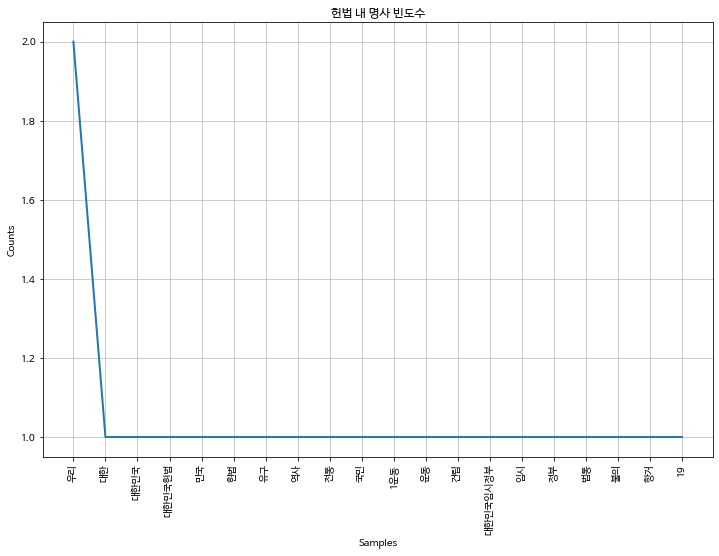

In [ ]:
# 각 단어의 빈도수 시각화

plt.figure(figsize = (12,8))
plt.title('헌법 내 명사 빈도수')
text.plot(20)
plt.show()

#### komoran

In [ ]:

law_nouns2 = komoran.nouns(law)

# 2글자 이상인 단어들만 추출
nouns2 = [n for n in law_nouns2 if len(n) >= 2]
len(nouns2)

text2 = Text(nouns2)

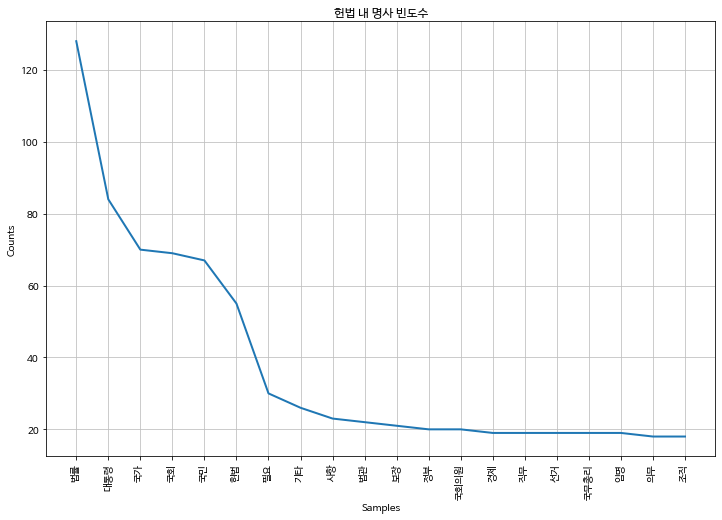

In [ ]:
plt.figure(figsize = (12,8))

plt.title('헌법 내 명사 빈도수')
text2.plot(20)
plt.show()